<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
# Check that we have a GPU instance of Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun May  3 01:48:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import reuters

batch_size = 32

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
word_index = {k:(v+3) for k,v in word_index.items()}

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

# Perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [0]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

In [7]:
class_names = ['']

all_articles = np.concatenate((X_train, X_test), axis=0)

# Review lengths across test and training whole datasets
print("Maximum article length: {}".format(len(max((all_articles), key=len))))
print("Minimum article length: {}".format(len(min((all_articles), key=len))))
result = [len(x) for x in all_articles]
print("Mean article length: {}".format(np.mean(result)))

print("")
print("Machine Readable Article")
print("  Article Text: " + str(X_train[10]))
print("  Article Class: " + str(y_train[10]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Article")
print("  Article Text: " + decode_review(X_train[10]))
print("  Article Class: " + str(y_train[10]))

Maximum article length: 2376
Minimum article length: 2
Mean article length: 145.96419665122906

Machine Readable Article
  Article Text: [1, 4, 1456, 5, 141, 357, 1103, 332, 21, 4, 8239, 5, 678, 40, 10706, 218, 21, 4, 4537, 3309, 357, 76, 7, 4, 585, 121, 66, 199, 8, 144, 34, 210, 13704, 1221, 13, 1091, 1875, 50, 34, 958, 1646, 622, 77, 8, 787, 24, 858, 1580, 9545, 62, 129, 1104, 554, 77, 8, 77, 133, 569, 9, 1856, 6, 500, 198, 2424, 13, 91, 950, 225, 121, 290, 4, 195, 5, 4, 1056, 357, 869, 5787, 2943, 8, 331, 36, 64, 45, 836, 830, 185, 25, 2424, 41, 4085, 17, 12]
  Article Class: 9

Human Readable Article
  Article Text: <START> the failure of international coffee organization talks on the reintroduction of quotas has paralysed business on the hamburg green coffee market in the past week trade sources said there was only sporadic activity for spot material which was mainly requirement buying they said adding that pre registered coffees were no longer available they said they expected br

In [0]:
# Pad the articles to make them equal length
from tensorflow.keras.preprocessing import sequence

maxlen=225

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [0]:
y_train = tf.one_hot(y_train, depth=46, axis=-1)
y_test = tf.one_hot(y_test, depth=46, axis=-1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM

lstm = Sequential()
lstm.add(Embedding(max_features, 128))
lstm.add(LSTM(32))
lstm.add(Dropout(0.25))
lstm.add(Dense(46, activation='softmax'))

lstm.compile(loss='categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])


In [11]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3965952   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                20608     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 46)                1518      
Total params: 3,988,078
Trainable params: 3,988,078
Non-trainable params: 0
_________________________________________________________________


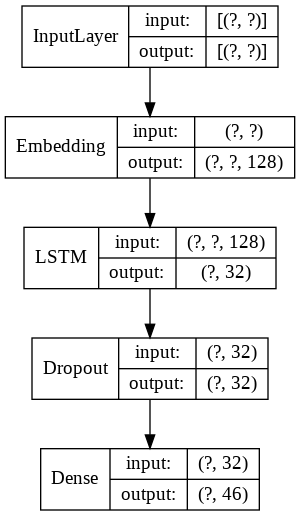

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(lstm, to_file='lstm.png', show_shapes=True, show_layer_names=False)

In [13]:
lstm_history = lstm.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        batch_size=batch_size,
                        epochs=5,
                        verbose=1)

Epoch 1/5
281/281 [==============================] - 13s 47ms/step - loss: 2.4956 - accuracy: 0.3704 - val_loss: 1.8626 - val_accuracy: 0.5062
Epoch 2/5
281/281 [==============================] - 13s 46ms/step - loss: 1.8060 - accuracy: 0.5372 - val_loss: 1.8019 - val_accuracy: 0.5539
Epoch 3/5
281/281 [==============================] - 13s 46ms/step - loss: 1.6878 - accuracy: 0.5630 - val_loss: 1.6194 - val_accuracy: 0.5614
Epoch 4/5
281/281 [==============================] - 13s 45ms/step - loss: 1.4905 - accuracy: 0.5950 - val_loss: 1.6297 - val_accuracy: 0.5646
Epoch 5/5
281/281 [==============================] - 13s 45ms/step - loss: 1.3365 - accuracy: 0.6436 - val_loss: 1.4934 - val_accuracy: 0.6296


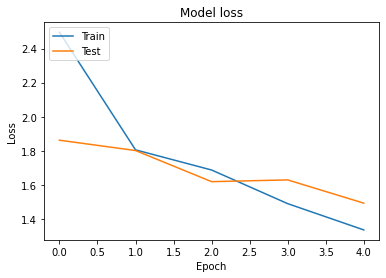

In [14]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

`pad_sequences` is used to add empty values to the front or back of a document under a certain length. This is done to ensure that there are enough values in every document to make every document the same number dimensions to feed into the network.


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

The primary motivation of using an LSTM over a 'vanilla' RNN is that LSTMs are capable of holding information in the memory state over long periods of time. While both are used for sequential data, RNNs only hold over information from the previous cell, where as the LSTMs 'forget' function allows it to hold important information over many cells.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

LSTMs are great at analyzing sequential information:

*   Time-series data like stock market prices
*   Text classification
*   Generative tasks like text or music composition





<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [0]:
from skimage.io import imread_collection

images = imread_collection('./frog_images/*.jpg')

In [26]:
print(type(images))
print(type(images[0]), end="\n\n")

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>



In [27]:
images[5].shape

(2883, 4319, 3)

In [28]:
print(len(images))

15


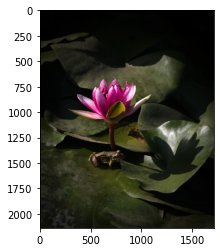

In [29]:
plt.figure()
plt.imshow(images[0])

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [0]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
from pathlib import Path

pathlist = Path('./frog_images').glob('**/*.jpg')

def process_imgs(images):
  img = image.load_img(images, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return x

In [0]:
classes = ['bullfrog', 'tree from', 'tailed from']

In [0]:
imgs = [process_imgs(x) for x in pathlist]

In [42]:
type(imgs)

list

In [0]:
base_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1000, activation='softmax')

base_model.trainable=False

model = Sequential()
model.add(base_model)
model.add(global_average_layer)
model.add(prediction_layer)

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [0]:
history = model.predict(imgs[14],
                        batch_size=3)

The top 5 predictions this model made:
lighter
moped
pay-phone
bullfrog
slug
For this input image:


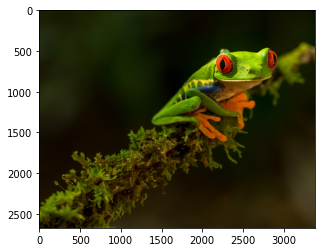

In [87]:
pred = decode_predictions(history, top=5)
print("The top 5 predictions this model made:")
for i in pred[0]:
  print(i[1])
print("For this input image:")
plt.figure()
plt.imshow(images[14])

Yay! Bullfrog! It's a tree from, but it's the only image that the model was correctly able to identify that had a frog in it. 10.5 hours later!

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

Autoencoders are great for image denoising. To train a network to sharpen certain classes of images, the ML engineer can feed the network images overlayed with randomly generated noise pixels (or use-case specific data that may commonly occur in the real world). The autoencoder will focus on on the important, non-random features of the input data during downsampling, and then pass these features up during upsampling - minus the noise. 


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

I would have to say, regretably, that my strongest area of practical application would have to be my utilization of the Sci-kit Learn API. We had a lot of practice with it and it's generally user friendly. I say regretably because I would prefer to honestly say that this area - Neural Networks and NLP - is my strongest area because of the growth of the field and its applicability to real world problems, but we didn't have enough reps on this IMO.
- What area of Data Science would you most like to learn more about, and why?

Reinforcement Learning, NLP, and Graph Theory. Reinforcement learning is going to be an incredibly important part of the future growth of the industry, capable of tackling truly amazing scientific questions that remain unsolved. As well, unstructured text data accounts for a tremendous portion of the world's most easily accessible data. NLP will remain a vital tool for analyzing that data for many years to come. Graph theory is something that can be siginificantly helpful for both of these tasks, and understanding it and its applications to graph databases, will be of very high value.
- Where do you think Data Science will be in 5 years?

I believe Data Science as its practiced today will grow significantly over the next five years, and the applications of the more advanced areas of academic reasearch will start to become reachable for novice and intermediate level data scientists. For example right now Reinforcement learning is still in the academic stages of study, with only a handful of organizations applying it in production. In five years time that ability for lay-data scientist to utilize it in their applications will grow to a point where many new products, features, and platforms will include reinforcement learning via some kind of higher level API.
- What are the threats posed by AI to our society?

I don't believe AI poses an existential threat to society any time in the near or intermediate future; if robots do become sentient and decide to rise up and kill us in the next 25 years all we have to do is unplug them. However, there are some risks that must be accounted for now in order to avoid large cultural blow back. The number of jobs lost to AI and automation technologies will continue to mount in the next generation. Increased productivity, not outsourcing, has and will continue to push lower level manufacturing and white collar roles closer to extinction. 
- How do you think we can counteract those threats? 

With any great industrial shift there always comes a transition period wherein those previously trained to execute roles that are no longer necessary were retrained for new roles that appeared as a result of the shift. During the last great industrial revolution there was very little recent precedence that policy makers could look to to develop strategies to mitigate the impact of such a shift. Any solution that comes about would likely have to be a mix of public policy and private investment to have the greatest possible impact.
- Do you think achieving General Artifical Intelligence is ever possible?

Yes, 100%. I believe fully that every sentient organism in existence is the byproduct of a very complicated mathematical fabric. Given enough time and computing power, the ability to implement the math necessary to achieve sentience and AGI is not only possible but inevitable.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")